# Chapter py_04 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

# Python: Random numbers

In [2]:
# set the seed to ensure a different outcome
import random
random.seed()

## Generating random numbers using the `random` package

 generate a random number between 0 and 1

In [3]:
import random
print(random.random(), random.random())

0.11998033830197785 0.23967005420940946


 set a random seed to ensure that the same sequence is generated each time

In [4]:
random.seed(123)
print(random.random(), random.random())
random.seed(123)
print(random.random(), random.random())

0.052363598850944326 0.08718667752263232
0.052363598850944326 0.08718667752263232


In [5]:
print(random.randrange(0, 10, 2)) # 6 - output from 2, 4, 6, or 8
print(random.randint(0, 10))      # 4 - output from 0, 1, ..., 9, or 10
print(random.choice([0, 1, 2]))   # 0 - output from 0, 1, or 2

6
4
0


In [6]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
random.shuffle(x)
print(x) # [7, 8, 3, 4, 1, 9, 2, 5, 6, 0]
print(random.sample(x, k=3)) # [4, 3, 7]
print(random.choices(x, k=6)) # [0, 5, 6, 4, 7, 5]

[7, 8, 3, 4, 1, 9, 2, 5, 6, 0]
[4, 3, 7]
[0, 5, 6, 4, 7, 5]


## Generating random numbers using `numpy` and `scipy`

 Initalize a random number generator

In [7]:
import numpy as np
rng = np.random.default_rng(seed=321)
print(rng.random()) # 0.6587666953866232
print(rng.random()) # 0.9083083579615744

0.6587666953866232
0.9083083579615744


In [8]:
print(rng.integers(low=0, high=10, size=3)) # [6 4 3]
print(rng.uniform(low=0, high=10, size=3)) # [5.55856507 9.00575242 6.82980572]

[6 4 3]
[5.55856507 9.00575242 6.82980572]


In [9]:
# sample with replacement
print(rng.choice([0, 1, 2, 3, 4], size=3)) # [3 3 0]
# sample without replacement
print(rng.choice([0, 1, 2, 3, 4], size=3, replace=False)) # [2 1 0]

[3 3 0]
[2 1 0]


In [10]:
from scipy.stats import norm
rng = np.random.default_rng(seed=123) # create a RNG with a fixed seed for reproducibility
print(norm.rvs(loc=0.0, scale=1.0, size=3, random_state=rng)) 
# [-0.98912135 -0.36778665  1.28792526]
print(norm.pdf(x=0.0, loc=0.0, scale=1.0)) 
# 0.3989422804014327
print(norm.cdf(x=0.0, loc=0.0, scale=1.0)) 
# 0.5

[-0.98912135 -0.36778665  1.28792526]
0.3989422804014327
0.5


## Using random numbers in other packages

In [11]:
import pandas as pd
df = pd.DataFrame({'a': [1, 2, 3, 4, 5], 'b': [6, 7, 8, 9, 10]})
print(df.sample(n=3, random_state=123))

   a   b
1  2   7
3  4   9
4  5  10


In [12]:
import pandas as pd
df = pd.read_csv("hospitalerrors_2.csv")
print(df.head())

   Row  Hospital  Treatment  Reduction
0    1       239          0          3
1    2      1126          0          1
2    3      1161          0          2
3    4      1293          1          2
4    5      1462          1          2


In [13]:
mean_reduction = df[['Treatment', 'Reduction']].groupby("Treatment").mean()
print(mean_reduction)

           Reduction
Treatment           
0               1.88
1               2.80


In [14]:
observed_difference = (mean_reduction.loc[1, 'Reduction'] - 
                       mean_reduction.loc[0, 'Reduction'])
print(f'Observed reduction {observed_difference:.3f}')

Observed reduction 0.920


In [15]:
observation = df['Reduction']
treatment = df['Treatment']

In [16]:
import random
random.seed(123)  # set the seed to ensure a different outcome
shuffled = list(observation) # create a copy of the list
random.shuffle(shuffled)

# split the shuffled observations by treatment group
observed_0 = []
observed_1 = []
for obs, treat in zip(shuffled, treatment):
    if treat == 0:
        observed_0.append(obs)
    else:
        observed_1.append(obs)

# calculate the mean reduction for the treatment and control group
obs_treatment_0 = sum(observed_0) / len(observed_0)
obs_treatment_1 = sum(observed_1) / len(observed_1)

# calculate the difference
obs_difference = obs_treatment_1 - obs_treatment_0
print(f'Observed difference after shuffling: {obs_difference:.3f}')

Observed difference after shuffling: 0.200


In [17]:
observed_0 = [obs for obs, treat in zip(shuffled, treatment) if treat == 0]
observed_1 = [obs for obs, treat in zip(shuffled, treatment) if treat == 1]

In [18]:
import numpy as np
obs_treatment_0 = np.mean(observed_0)
obs_treatment_1 = np.mean(observed_1)

In [19]:
shuffled = observation.copy() # create a copy of the observations
random.shuffle(shuffled)  # shuffle the copy
means = shuffled.groupby(treatment).mean()
means[1] - means[0]

-0.1200000000000001

In [20]:
shuffled = observation.copy() # create a copy of the observations
differences = []
for _ in range(1000):
    random.shuffle(shuffled)  # shuffle the copy
    means = shuffled.groupby(treatment).mean()
    differences.append(means[1] - means[0])

print(f"Mean difference after reshuffling {np.mean(differences):.2f}")
print(f"Minimum difference {np.min(differences):.2f}")
print(f"Maximum difference {np.max(differences):.2f}")

Mean difference after reshuffling -0.00
Minimum difference -1.16
Maximum difference 1.16


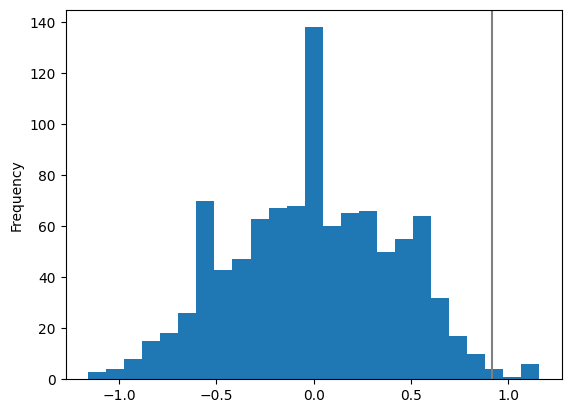

In [21]:
ax = pd.Series(differences).plot.hist(bins=25)
ax.axvline(x=observed_difference, color='grey')

In [22]:
nr_greater_observed = sum(d >= observed_difference for d in differences)
prob_observed =  nr_greater_observed / len(differences)
print("Probability of observing a difference of 0.92 or larger by chance: "
      f"{prob_observed:.1%}")

Probability of observing a difference of 0.92 or larger by chance: 1.1%


## Write functions for code reuse

In [23]:
def resampling_difference_means(observations, treatments, nr_trials=1000):
    """ Calculate differences in means between two treatment groups using resampling """
    # create an independent copy of the observations
    shuffled = pd.Series(observations)
    differences = []
    for _ in range(nr_trials):
        random.shuffle(shuffled)  # shuffle the copy
        means = shuffled.groupby(treatments).mean()
        differences.append(means[1] - means[0])
    return differences

In [24]:
differences = resampling_difference_means(df['Reduction'], df['Treatment'], nr_trials=2000)
print(f"Mean difference after reshuffling {np.mean(differences):.2f}")
print(f"Minimum difference {np.min(differences):.2f}")
print(f"Maximum difference {np.max(differences):.2f}")

Mean difference after reshuffling -0.02
Minimum difference -1.24
Maximum difference 1.24
